# Vector Auto Regression Participant 1

## What is VAR?

[Notebook based on this tutorial](https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/#:~:text=Vector%20Autoregression%20(VAR)%20%E2%80%93%20Comprehensive%20Guide%20with%20Examples%20in%20Python&text=Vector%20Autoregression%20(VAR)%20is%20a,series%20involved%20is%20bi%2Ddirectional)

Vector Autoregression (VAR) is a multivariate forecasting algorithm that is used when two or more time series influence each other. It is considered as an Autoregressive model because, each variable (time series) is modeled as a function of the past values. The VAR model includes the variable's lagged (past) values, the lagged values of the other variables in the model, and an error term.

In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

from IPython.display import display, HTML
sns.set_style("dark")
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Getting data
input = open("../data/preprocessed/preprocessedMostImportantDataParticipant1.txt", "rb")
df = pickle.load(input)
input.close()

df.head(50)

,alpiSki,aroundEyesPain,basisPeakSteps,calories,climbing,climbingDenivelation,climbingMaxEffortIntensity,climbingMeanEffortIntensity,cum_gain_cycling,cum_gain_running,...,whatPulseKeysT,whatPulseT,tracker_mean_distance,cum_gain,tracker_mean_denivelation,whatPulseT_corrected,manicTimeDelta_corrected,fingerHandArmPain,foreheadEyesPain,cycling
2016-01-01,0.0,0.0,1884.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,3959.0,5865.0,1.651759,0.0,0.0,5865.0,322.0,1.0,2.0,0.0
2016-01-02,0.0,0.0,3267.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,2845.0,5522.0,2.864277,0.0,0.0,5522.0,314.0,1.0,2.0,0.0
2016-01-03,0.0,0.0,2246.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,5868.0,11985.0,1.969135,0.0,0.0,11985.0,562.0,2.0,10.0,0.0
2016-01-04,0.0,0.0,3869.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,2228.0,7084.0,3.392068,0.0,0.0,7084.0,380.0,1.0,10.0,0.0
2016-01-05,0.0,0.0,3388.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,3958.0,9377.0,2.970361,0.0,0.0,9377.0,537.0,1.0,10.0,0.0
2016-01-06,0.0,0.0,4215.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,4291.0,9872.0,3.695417,0.0,0.0,9872.0,440.0,1.0,4.0,0.0
2016-01-07,0.0,0.0,3743.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,8779.0,12897.0,3.281600,0.0,0.0,12897.0,562.0,4.0,4.0,0.0
2016-01-08,0.0,0.0,4119.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,5908.0,11465.0,3.611251,0.0,0.0,11465.0,546.0,1.0,10.0,0.0
2016-01-09,0.0,0.0,1950.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,5293.0,9425.0,1.709623,0.0,0.0,9425.0,481.0,2.0,10.0,0.0
2016-01-10,0.0,0.0,2074.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,10906.0,14910.0,1.818338,0.0,0.0,14910.0,408.0,1.0,10.0,1.0


# Exploratory Data Analysis

## Descriptives

In [26]:
print(f"dataframe shape: {df.shape}")
print(f"total columns: \n\n {df.columns}")
df.describe()

dataframe shape: (1452, 27)
total columns: 

 Index(['basisPeakSteps', 'calories', 'climbingDenivelation',
       'climbingMeanEffortIntensity', 'elevation_loss',
       'fitbitMinutesFairlyActive', 'fitbitMinutesLightlyActive',
       'fitbitMinutesVeryActive', 'forearmElbowPain', 'foreheadAndEyesPain',
       'googlefitSteps', 'kneePain', 'manicTimeBlankScreenC1',
       'manicTimeBlankScreenC3', 'movesSteps', 'painInOtherRegion',
       'shoulderNeckPain', 'sick_tired', 'surfing', 'timeDrivingCar', 'walk',
       'whatPulseClicksC3', 'whatPulseKeysC2', 'whatPulseKeysT', 'cum_gain',
       'tracker_mean_denivelation', 'fingerHandArmPain'],
      dtype='object')


,basisPeakSteps,calories,climbingDenivelation,climbingMeanEffortIntensity,elevation_loss,fitbitMinutesFairlyActive,fitbitMinutesLightlyActive,fitbitMinutesVeryActive,forearmElbowPain,foreheadAndEyesPain,...,sick_tired,surfing,timeDrivingCar,walk,whatPulseClicksC3,whatPulseKeysC2,whatPulseKeysT,cum_gain,tracker_mean_denivelation,fingerHandArmPain
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,...,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,0.057790,0.020640,0.035736,0.067941,0.004399,0.116285,0.278048,0.094019,0.288373,0.119707,...,0.028007,0.079201,0.057279,0.483471,0.106311,0.019369,0.250677,0.017568,0.060785,0.353459
std,0.120428,0.073202,0.106851,0.224528,0.031042,0.152573,0.200431,0.138520,0.367458,0.255572,...,0.124704,0.270145,0.090774,0.499899,0.196876,0.095553,0.170887,0.077597,0.088985,0.248013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.149682,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.119530,0.000000,0.003460,0.111111
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.059524,0.277070,0.032258,0.000000,0.000000,...,0.000000,0.000000,0.036364,0.000000,0.000000,0.000000,0.242137,0.000000,0.034602,0.333333
75%,0.034611,0.000000,0.000000,0.000000,0.000000,0.178571,0.398089,0.141935,0.743590,0.000000,...,0.000000,0.000000,0.054545,1.000000,0.149968,0.000000,0.367902,0.000000,0.076125,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Preprocessing

In [6]:
# Remove painthreshold as it has no variation in the data
# scooterRiding messus up the analysis, so drop too
df = df.drop(['painthreshold', 'scooterRiding'], axis=1)

## Missing data

In [7]:
# How many observations are equal to 0.0
print("How many rows equal to 0.0 per column? ")
print(df[df == 0.0].count())

# Which columns contain NaNs
columns_missing_data = df.columns[df.isna().any()].tolist()
print("Columns with missing data")
print(df[columns_missing_data].isna().sum())

# Remove columns where number of NaN > 1400
df = df.dropna(axis=1, thresh= (len(df)-1400))

# Remove columns where number of 0.0 > 1400
keep_cols = df[df == 0.0].count() < 1400
keep_cols = keep_cols[keep_cols == True].index.tolist()

# Columns we are going to work with
df = df[keep_cols]

# How many columns left
print(f"number of columns left {len(df.columns)}")

How many rows equal to 0.0 per column? 
alpiSki                     1446
aroundEyesPain               265
basisPeakSteps              1087
calories                    1218
climbing                    1260
                            ... 
whatPulseT_corrected          13
manicTimeDelta_corrected      13
fingerHandArmPain              0
foreheadEyesPain               0
cycling                     1405
Length: 68, dtype: int64
Columns with missing data
cum_gain_cycling    1444
cum_gain_running    1451
cum_gain_walking    1297
dtype: int64
number of columns left 57


## Normalize data

In [9]:
columns = df.columns
df_index = df.index

# Normalize data
from sklearn.preprocessing import MinMaxScaler, normalize
x = df.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns = df.columns, index = df_index)

## Visualization


Visualize to see whether there is a trend, seasonality or if certain variables move together.

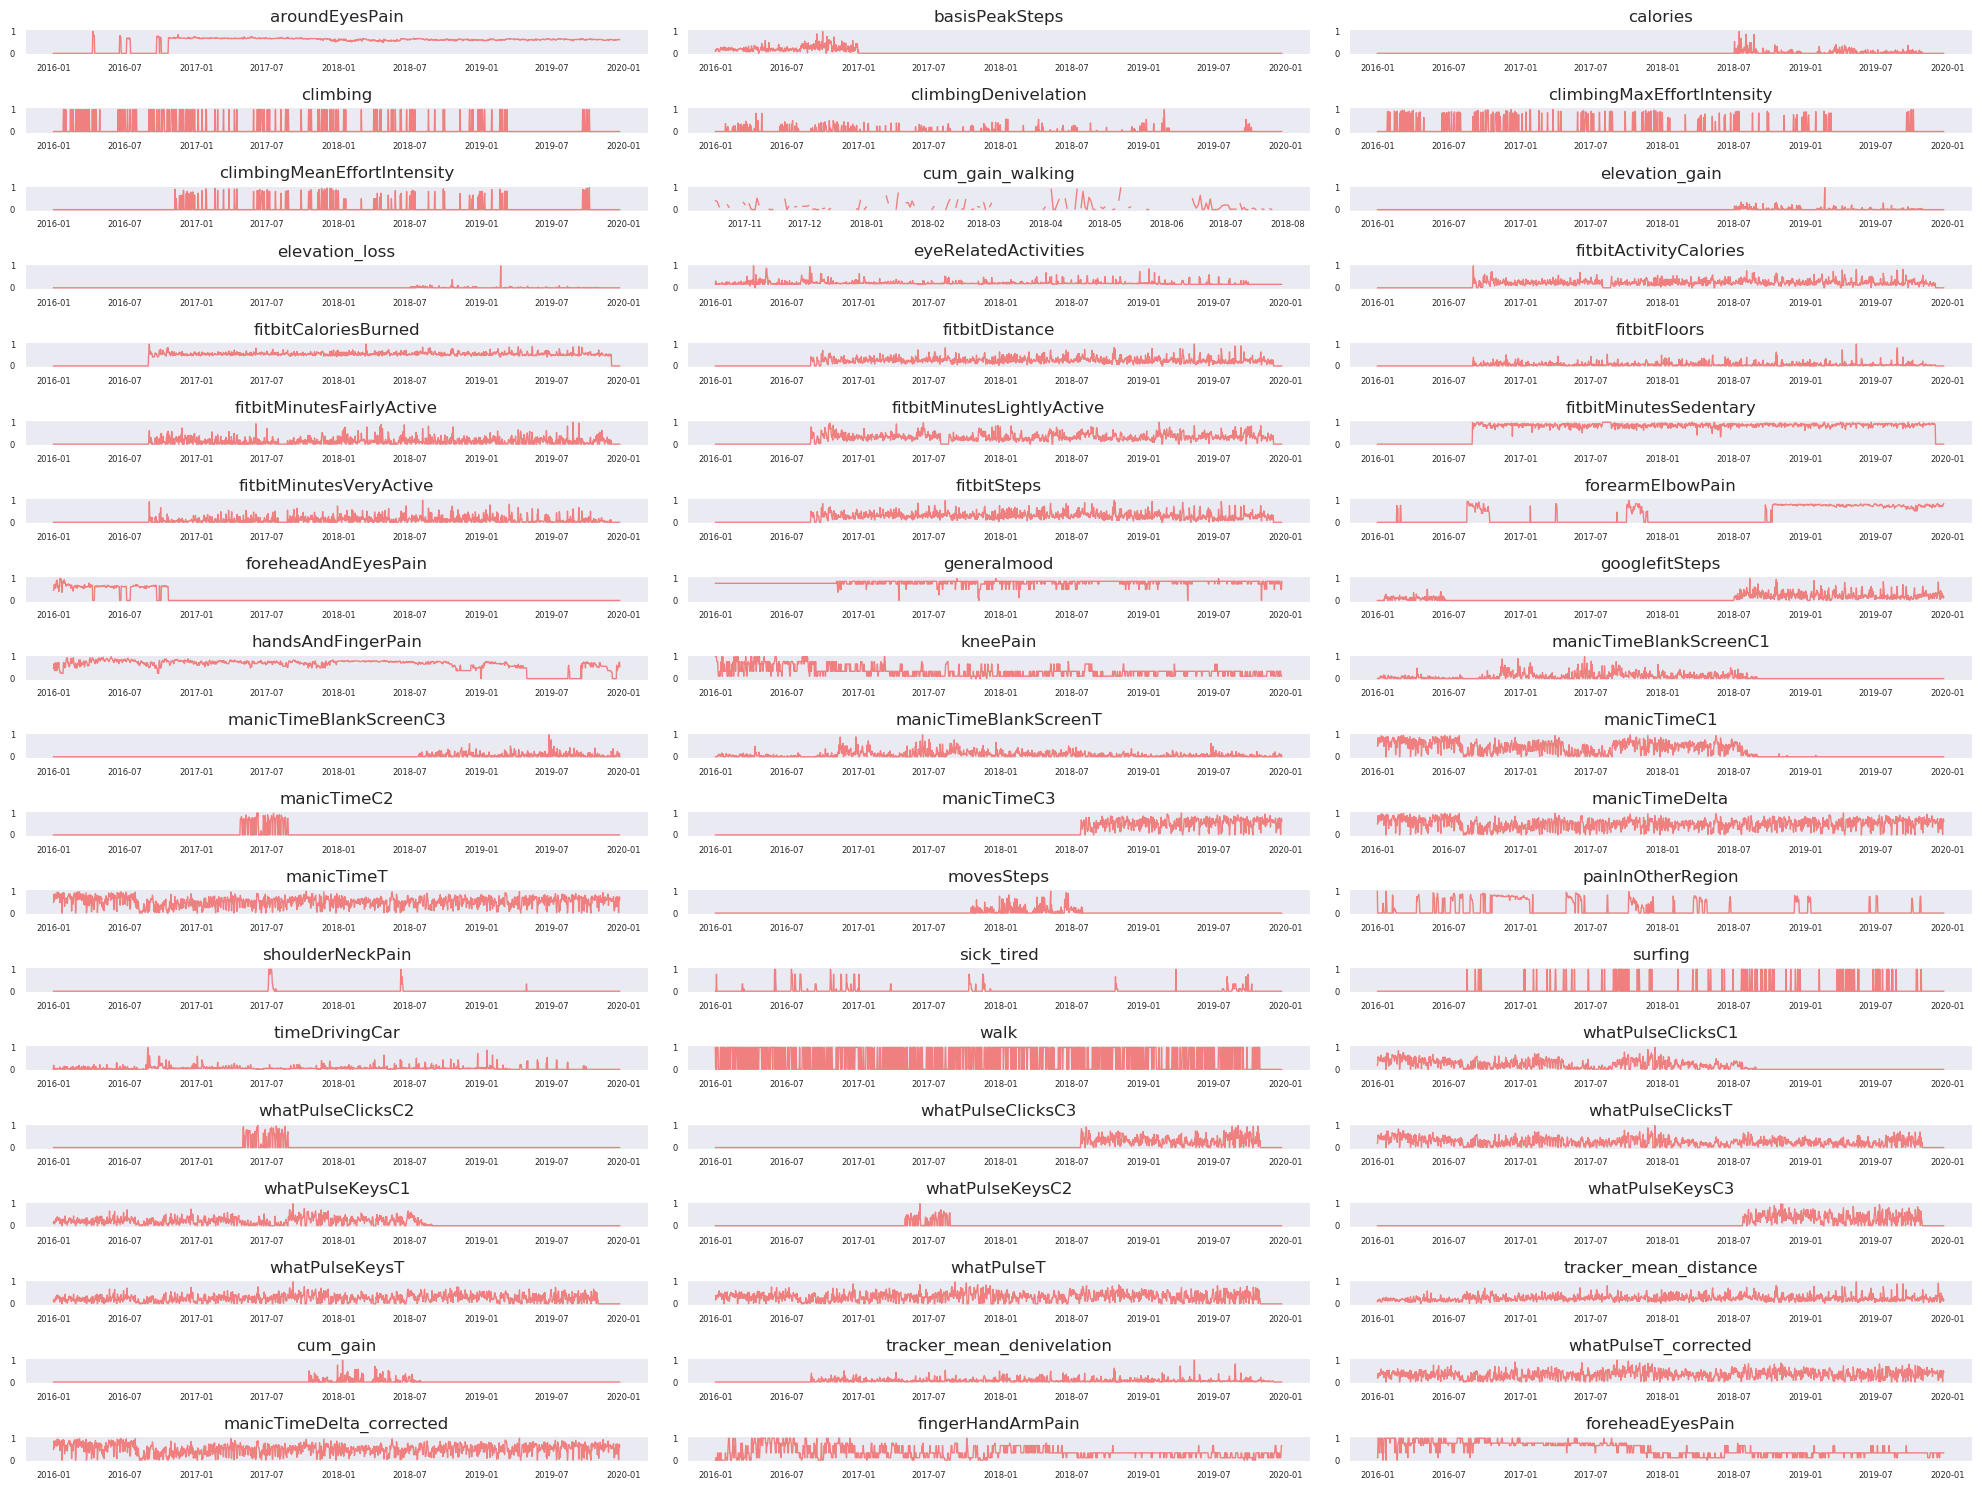

In [11]:
# Plot
# Doubleclick to enlarge the figure
fig, axes = plt.subplots(nrows=19, ncols=3, dpi=100, figsize=(20,15))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='lightcoral', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

## Correlation

In [12]:
def correlation_plot(data):
    
    """Plot heatmap of correlations for numerical values"""

    sns.set(style="white")
    
    numerical=df.columns
    
    corr = data[numerical].corr()
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=np.bool))
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(15,15))
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
    ax.tick_params(axis='both', labelsize=8)
    
    plt.xticks(rotation=45, horizontalalignment="right")
    
    plt.show()

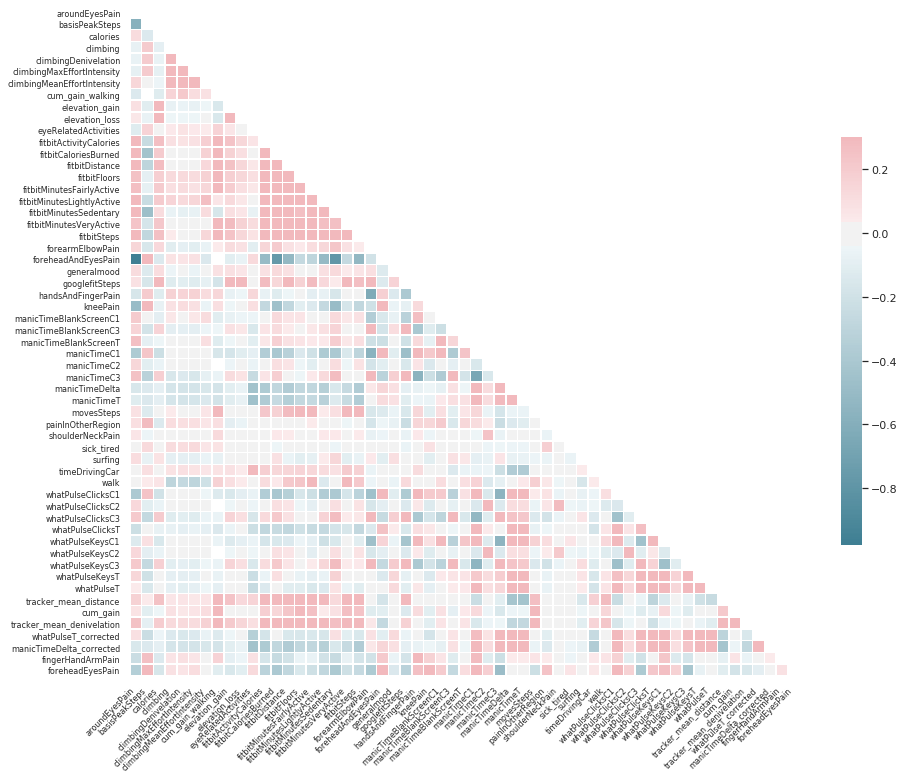

In [13]:
correlation_plot(df)

## VIF Analysis

A variance inflation factor (VIF) detects multicollinearity in regression analysis. Multicollinearity is when there’s correlation between predictors (i.e. independent variables) in a model and can distort the results of the model. The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model.

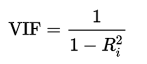

Interpretation of the VIF value:
- 1 = not correlated
- Between 1 and 5 = moderately correlated
- Greater than 5 = highly correlated

We remove variables with VIF factor greater than 5. 

In [14]:
# VIF function does not work with np.nan
# So we set nan values equal to 0 (assuming that there was no walking)
df = df.fillna(0)

In [15]:
import time
from statsmodels.stats.outliers_influence import variance_inflation_factor    
from joblib import Parallel, delayed

# Defining the function that you will run later
def calculate_vif_(X, thresh=5.0):
    variables = [X.columns[i] for i in range(X.shape[1])]
    dropped=True
    while dropped:
        dropped=False
        print(f"length of variables: {len(variables)}")
        vif = Parallel(n_jobs=-1,verbose=5)(delayed(variance_inflation_factor)(X[variables].values, ix) for ix in range(len(variables)))

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print(time.ctime() + ' dropping \'' + X[variables].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables.pop(maxloc)
            dropped=True

    print('Remaining variables:')
    print([variables])
    return X[[i for i in variables]]

X = df[df.columns] # Selecting your data

X2 = calculate_vif_(X,5) # Actually running the function

length of variables: 57


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of  57 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  56 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Sat Nov 14 17:04:43 2020 dropping 'manicTimeBlankScreenT' at index: 28
length of variables: 56
Sat Nov 14 17:04:43 2020 dropping 'manicTimeC1' at index: 28
length of variables: 55


[Parallel(n_jobs=-1)]: Done  32 out of  55 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  44 out of  55 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  54 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  54 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Sat Nov 14 17:04:44 2020 dropping 'whatPulseClicksC1' at index: 39
length of variables: 54
Sat Nov 14 17:04:44 2020 dropping 'whatPulseClicksT' at index: 41
length of variables: 53


[Parallel(n_jobs=-1)]: Done  19 out of  53 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  53 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  52 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  40 out of  52 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Sat Nov 14 17:04:44 2020 dropping 'whatPulseKeysC1' at index: 41
length of variables: 52
Sat Nov 14 17:04:44 2020 dropping 'manicTimeDelta' at index: 30
length of variables: 51


[Parallel(n_jobs=-1)]: Done  17 out of  51 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  28 out of  51 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  49 | elapsed:    0.0s remaining:    0.1s


Sat Nov 14 17:04:44 2020 dropping 'manicTimeT' at index: 30
length of variables: 50
Sat Nov 14 17:04:44 2020 dropping 'fitbitDistance' at index: 13
length of variables: 49
Sat Nov 14 17:04:44 2020 dropping 'fitbitActivityCalories' at index: 11
length of variables: 48


[Parallel(n_jobs=-1)]: Done  26 out of  49 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  36 out of  49 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  48 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of  47 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  44 out of  47 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Sat Nov 14 17:04:44 2020 dropping 'fitbitCaloriesBurned' at index: 11
length of variables: 47
Sat Nov 14 17:04:44 2020 dropping 'whatPulseT' at index: 39
length of variables: 46
Sat Nov 14 17:04:44 2020 dropping 'aroundEyesPain' at index: 0
length of variables: 45


[Parallel(n_jobs=-1)]: Done  33 out of  46 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  43 out of  46 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  44 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  39 out of  44 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Sat Nov 14 17:04:45 2020 dropping 'fitbitFloors' at index: 10
length of variables: 44
Sat Nov 14 17:04:45 2020 dropping 'climbing' at index: 2
length of variables: 43
Sat Nov 14 17:04:45 2020 dropping 'generalmood' at index: 16
length of variables: 42


[Parallel(n_jobs=-1)]: Done  29 out of  43 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  38 out of  43 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  42 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  37 out of  42 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  41 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  36 out of  41 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Sat Nov 14 17:04:45 2020 dropping 'whatPulseT_corrected' at index: 38
length of variables: 41
Sat Nov 14 17:04:45 2020 dropping 'fitbitSteps' at index: 13
length of variables: 40
Sat Nov 14 17:04:45 2020 dropping 'manicTimeDelta_corrected' at index: 37
length of variables: 39
Sat Nov 14 17:04:45 2020 dropping 'tracker_mean_distance' at index: 34
length of variables: 38


[Parallel(n_jobs=-1)]: Done  26 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  39 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  32 out of  39 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  38 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  31 out of  38 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  37 | elapsed:    0.0s remainin

Sat Nov 14 17:04:45 2020 dropping 'whatPulseClicksC2' at index: 29
length of variables: 37
Sat Nov 14 17:04:45 2020 dropping 'fitbitMinutesSedentary' at index: 11
length of variables: 36
Sat Nov 14 17:04:45 2020 dropping 'eyeRelatedActivities' at index: 8
length of variables: 35
Sat Nov 14 17:04:45 2020 dropping 'handsAndFingerPain' at index: 14
length of variables: 34


[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  36 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  29 out of  36 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  28 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  34 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  34 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  32 out of  34 | elapsed:    0.0s remainin

Sat Nov 14 17:04:45 2020 dropping 'whatPulseKeysC3' at index: 28
length of variables: 33
Sat Nov 14 17:04:45 2020 dropping 'elevation_gain' at index: 6
length of variables: 32
Sat Nov 14 17:04:45 2020 dropping 'manicTimeC3' at index: 17
length of variables: 31
Sat Nov 14 17:04:45 2020 dropping 'climbingMaxEffortIntensity' at index: 3
length of variables: 30
Sat Nov 14 17:04:45 2020 dropping 'cum_gain_walking' at index: 4
length of variables: 29


[Parallel(n_jobs=-1)]: Done  17 out of  33 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  33 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  31 out of  33 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  32 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  23 out of  32 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  32 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  31 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  22 out of  31 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  29 out of  31 | elapsed:   

Sat Nov 14 17:04:45 2020 dropping 'foreheadEyesPain' at index: 28
length of variables: 28
Sat Nov 14 17:04:46 2020 dropping 'manicTimeC2' at index: 14
length of variables: 27
Remaining variables:
[['basisPeakSteps', 'calories', 'climbingDenivelation', 'climbingMeanEffortIntensity', 'elevation_loss', 'fitbitMinutesFairlyActive', 'fitbitMinutesLightlyActive', 'fitbitMinutesVeryActive', 'forearmElbowPain', 'foreheadAndEyesPain', 'googlefitSteps', 'kneePain', 'manicTimeBlankScreenC1', 'manicTimeBlankScreenC3', 'movesSteps', 'painInOtherRegion', 'shoulderNeckPain', 'sick_tired', 'surfing', 'timeDrivingCar', 'walk', 'whatPulseClicksC3', 'whatPulseKeysC2', 'whatPulseKeysT', 'cum_gain', 'tracker_mean_denivelation', 'fingerHandArmPain']]


[Parallel(n_jobs=-1)]: Done  11 out of  28 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  17 out of  28 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  23 out of  28 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  27 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  27 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  22 out of  27 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.0s finished


 ## Testing Causation using Granger’s Causality Test

The basis behind Vector AutoRegression is that each of the time series in the system influences each other. That is, you can predict the series with past values of itself along with other series in the system.

It’s possible to test this relationship before even building the model. Granger’s causality tests the null hypothesis that the coefficients of past values in the regression equation is zero.

In simpler terms, the past values of time series (X) do not cause the other series (Y). So, if the p-value obtained from the test is lesser than the significance level of 0.05, then, you can safely reject the null hypothesis.

The below code implements the Granger’s Causality test for all possible combinations of the time series in a given dataframe and stores the p-values of each combination in the output matrix.

In [16]:
# Use the remaining variables to create dataframe
df = df[['basisPeakSteps', 'calories', 'climbingDenivelation', 'climbingMeanEffortIntensity', 'elevation_loss', 'fitbitMinutesFairlyActive', 'fitbitMinutesLightlyActive', 'fitbitMinutesVeryActive', 'forearmElbowPain', 'foreheadAndEyesPain', 'googlefitSteps', 'kneePain', 'manicTimeBlankScreenC1', 'manicTimeBlankScreenC3', 'movesSteps', 'painInOtherRegion', 'shoulderNeckPain', 'sick_tired', 'surfing', 'timeDrivingCar', 'walk', 'whatPulseClicksC3', 'whatPulseKeysC2', 'whatPulseKeysT', 'cum_gain', 'tracker_mean_denivelation', 'fingerHandArmPain']]

In [17]:
from statsmodels.tsa.stattools import grangercausalitytests

maxlag=12
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False): 
    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)      

,basisPeakSteps_x,calories_x,climbingDenivelation_x,climbingMeanEffortIntensity_x,elevation_loss_x,fitbitMinutesFairlyActive_x,fitbitMinutesLightlyActive_x,fitbitMinutesVeryActive_x,forearmElbowPain_x,foreheadAndEyesPain_x,...,sick_tired_x,surfing_x,timeDrivingCar_x,walk_x,whatPulseClicksC3_x,whatPulseKeysC2_x,whatPulseKeysT_x,cum_gain_x,tracker_mean_denivelation_x,fingerHandArmPain_x
basisPeakSteps_y,1.0000,0.0491,0.0001,0.0036,0.3267,0.0008,0.0000,0.0001,0.0072,0.0000,...,0.0001,0.0751,0.0928,0.0207,0.0001,0.1594,0.2539,0.1156,0.0006,0.1029
calories_y,0.0002,1.0000,0.2217,0.1595,0.1824,0.5686,0.0000,0.0523,0.0002,0.0002,...,0.2400,0.0090,0.7371,0.1807,0.0000,0.1141,0.0057,0.3195,0.1819,0.0001
climbingDenivelation_y,0.0002,0.0300,1.0000,0.1231,0.0000,0.0912,0.1815,0.1397,0.0012,0.0001,...,0.0002,0.0054,0.5183,0.0846,0.0117,0.5717,0.0508,0.0422,0.4543,0.0619
climbingMeanEffortIntensity_y,0.0021,0.1785,0.4589,1.0000,0.0015,0.3928,0.0001,0.2042,0.0093,0.0000,...,0.0032,0.1212,0.2451,0.0750,0.1876,0.0003,0.0019,0.0005,0.0151,0.0756
elevation_loss_y,0.0307,0.0000,0.0406,0.0152,1.0000,0.0298,0.0018,0.0505,0.0044,0.0349,...,0.4154,0.3841,0.0279,0.4099,0.0000,0.3628,0.0536,0.4885,0.0000,0.1267
fitbitMinutesFairlyActive_y,0.0000,0.0600,0.0023,0.1297,0.4501,1.0000,0.0000,0.2963,0.0007,0.0000,...,0.1761,0.0002,0.0069,0.2449,0.0005,0.0472,0.0214,0.0097,0.1627,0.0614
fitbitMinutesLightlyActive_y,0.0000,0.0118,0.0000,0.0000,0.0027,0.0058,1.0000,0.0009,0.0033,0.0000,...,0.1352,0.1116,0.0447,0.0205,0.0000,0.0558,0.0004,0.0563,0.0419,0.0012
fitbitMinutesVeryActive_y,0.0000,0.0083,0.0275,0.0590,0.1371,0.0457,0.0000,1.0000,0.0119,0.0000,...,0.1203,0.0001,0.0012,0.0627,0.0000,0.3345,0.0000,0.0675,0.3426,0.0662
forearmElbowPain_y,0.0364,0.8370,0.1966,0.4585,0.7232,0.0214,0.0548,0.2222,1.0000,0.1864,...,0.5270,0.0556,0.1584,0.3814,0.0021,0.4170,0.3253,0.5081,0.5163,0.0000
foreheadAndEyesPain_y,0.0000,0.5470,0.0130,0.5174,0.7637,0.0754,0.0001,0.0271,0.2592,1.0000,...,0.1607,0.1166,0.0170,0.0356,0.2370,0.6664,0.0992,0.6297,0.0619,0.5070


The row are the Response (Y) and the columns are the predictor series (X).If a given p-value is < significance level (0.05), then, the corresponding X series (column) causes the Y (row). If a p-value is lower than significance level, you can reject the null hypothesis and conclude that x causes y.

Looking at the P-Values in the above table, you can observe that all the variables (time series) in the system are interchangeably causing each other. This makes this system of multi time series a good candidate for using VAR models to forecast.

# VAR analysis

## Split into train and test set

In [19]:
nobs = 300
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(1152, 27)
(300, 27)


## stationarity assumption 
VAR assumes that the data is stationary: i.e. their means and variances are constant over time and do not show any trending behaviour. 

In [20]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

ADF shows that some variables are not stationary:

In [21]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "basisPeakSteps" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.6233
 No. Lags Chosen       = 23
 Critical value 1%     = -3.436
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.471. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "calories" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.5639
 No. Lags Chosen       = 23
 Critical value 1%     = -3.436
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0065. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "climbingDenivelation" 
    -----------------------------------------------
 Null Hypothesis: Data ha

    Augmented Dickey-Fuller Test on "tracker_mean_denivelation" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.4628
 No. Lags Chosen       = 18
 Critical value 1%     = -3.436
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0002. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "fingerHandArmPain" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.6515
 No. Lags Chosen       = 6
 Critical value 1%     = -3.436
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




## Differencing

We need to apply differencing to make the data stationary. Differencing is performed by subtracting the previous observation from the current observation
All variables become stationary after first order differencing.

In [22]:
# 1st difference
df_differenced = df_train.diff().dropna()

# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "basisPeakSteps" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.8562
 No. Lags Chosen       = 23
 Critical value 1%     = -3.436
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "calories" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.0727
 No. Lags Chosen       = 23
 Critical value 1%     = -3.436
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "climbingDenivelation" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary

    Augmented Dickey-Fuller Test on "whatPulseKeysT" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -11.1615
 No. Lags Chosen       = 21
 Critical value 1%     = -3.436
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "cum_gain" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -16.4534
 No. Lags Chosen       = 13
 Critical value 1%     = -3.436
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "tracker_mean_denivelation" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Sta

## Select the Order (P) of VAR model

To select the right order of the VAR model, we iteratively fit increasing orders of VAR model and pick the order that gives a model with least AIC.

Though the usual practice is to look at the AIC, you can also check other best fit comparison estimates of BIC, FPE and HQIC.

We continue with lag order = 6

In [24]:
# Choose lag
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,-114.6,-114.5,1.681e-50,-114.6
1,-119.4,-116.1*,1.392e-52,-118.1
2,-120.8,-114.3,3.388e-53,-118.3*
3,-121.4,-111.6,1.918e-53,-117.7
4,-121.6,-108.6,1.536e-53,-116.7
5,-121.9,-105.7,1.140e-53,-115.8
6,-122.0*,-102.6,1.049e-53*,-114.7
7,-121.7,-98.99,1.548e-53,-113.1
8,-121.6,-95.65,1.828e-53,-111.8
9,-121.3,-92.14,2.560e-53,-110.3


## Train the VAR Model of Selected Order(p)


In [25]:
model_fitted = model.fit(6)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 14, Nov, 2020
Time:                     17:05:06
--------------------------------------------------------------------
No. of Equations:         27.0000    BIC:                   -102.732
Nobs:                     1145.00    HQIC:                  -114.798
Log likelihood:           30446.3    FPE:                9.73272e-54
AIC:                     -122.117    Det(Omega_mle):     2.67654e-55
--------------------------------------------------------------------
Results for equation basisPeakSteps
                                    coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------------
const                                 -0.000466         0.002177           -0.214           0.831
L1.basisPeakSteps                     -0.839525         0.033974          -24.710